## Imports de utilidad


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yaml
from src.Metrics.metrics_utils import get_hist_from_str, plot_10,plot_histogram,similarity_metric, query_image, evaluate_query

config = yaml.load(open('/root/labint/scripts/LabInt/config/full_images_to_hist_config.yaml', 'r'), Loader=yaml.FullLoader)
n_bins = config['clusterization_config']['n_clusters']

## Método Handcrafted


In [2]:
df_handcrafted = pd.read_csv('/root/labint/scripts/LabInt/csv/total_quant_histogram.csv')
df_handcrafted.head()

,image_name,histogram
0,0_618577ba46bc3d04.jpg,[0.0040186 0.00703256 0. 0.00803721 0...
1,0_8684223b404f7e47.jpg,[0.0040186 0.00904186 0.01707907 0.0020093 0...
2,0_8c54ccf63a12ee74.jpg,[0.00403738 0. 0.00605607 0.00403738 0...
3,0_b904d301c9f168df.jpg,[0.01306047 0.00502326 0.01205581 0.00803721 0...
4,0_c8f198d7da690cc8.jpg,[0.00801317 0.00200329 0.00100165 0.00701152 0...


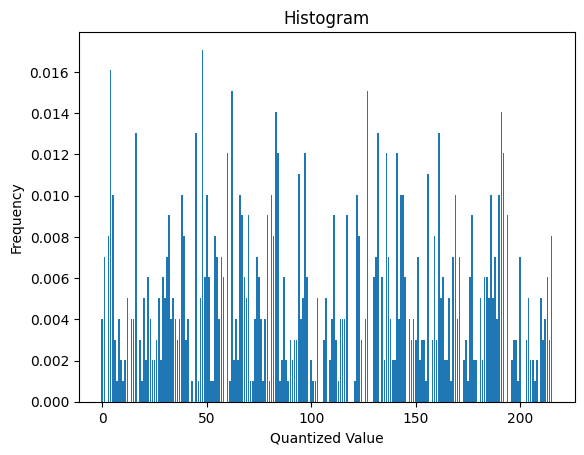

feature_type histogram unknown


In [3]:
plot_histogram(df_handcrafted, 0, n_bins,feature_type="histogram")

In [4]:
# import module from other directory
import sys
sys.path.insert(1, '../')

from src.SIFT.SIFT_gen_and_utils import SIFTFeatures

SIFT = SIFTFeatures("", "", run=False)
image_example = df_handcrafted["image_name"][999]
image_class = SIFT.get_class(image_example)
image_class

'1111_type1'

In [5]:
# get all images from the same class
df_handcrafted["class"] = df_handcrafted["image_name"].apply(lambda x: SIFT.get_class(x))
df_handcrafted["features_histogram"] = df_handcrafted["histogram"].apply(lambda x: get_hist_from_str(x, separator=' '))

In [6]:
image_example = df_handcrafted["image_name"][0]
df_query = query_image(df_handcrafted, image_example, measure="euclidean", feature_type = "histogram")
df_query

,image_name,histogram,class,features_histogram,similarity
0,0_618577ba46bc3d04.jpg,[0.0040186 0.00703256 0. 0.00803721 0...,0_type1,"[0.0040186, 0.00703256, 0.0, 0.00803721, 0.016...",0.000000
1,271_831e55be48c997e75f8c3017a2e656a2.jpg,[0.00803721 0.00502326 0.0040186 0.00803721 0...,271_type1,"[0.00803721, 0.00502326, 0.0040186, 0.00803721...",0.048682
2,303_eb4b51a0e5b9cdc67f996cb82a3e7a1f.jpg,[0.01105116 0.01707907 0.0040186 0.00100465 0...,303_type1,"[0.01105116, 0.01707907, 0.0040186, 0.00100465...",0.049707
3,223_852493e47ec68af44ace8a138476a183.jpg,[0.01004651 0.0020093 0.00100465 0.01306047 0...,223_type1,"[0.01004651, 0.0020093, 0.00100465, 0.01306047...",0.050112
4,238_59690349616fbfd30d5bd82e34fac4a5.jpg,[0.00401459 0.00401459 0.00100365 0.00602189 0...,238_type1,"[0.00401459, 0.00401459, 0.00100365, 0.0060218...",0.050920
...,...,...,...,...,...
8765,567_sketch_6.JPEG,[0.00108543 0. 0. 0. 0...,567_type1,"[0.00108543, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",0.765585
8766,836_121618504240_6.JPG,[0.40754717 0. 0. 0. 0...,836_type1,"[0.40754718, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",0.898892
8767,611_096.jpg,[0.00110548 0. 0. 0. 0...,611_type1,"[0.00110548, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",1.077377
8768,127403.jpg,[0.21343874 0. 0. 0. 0...,274_type2,"[0.21343873, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",1.746244


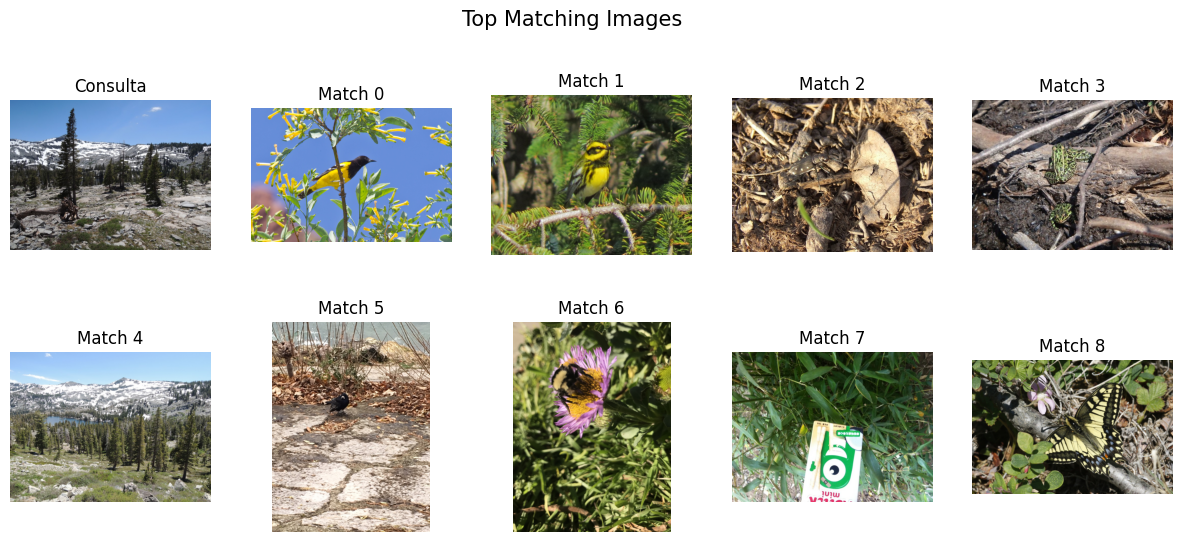

In [7]:
path_to_images = '/root/labint/scripts/LabInt/data/GPR1200/images'
plot_10(df_query,path_to_images)

In [8]:
# count how many different classes are
df_handcrafted["class"].nunique()

1700

In [9]:
# evaluating ranking method
image_example = df_handcrafted["image_name"][0]
evaluate_query(df_handcrafted, image_example, measure="euclidean", normalized=True)


0_type1
[0, 5, 83, 404, 442, 1383, 2834]


0.0974914481185861

## Método por Redes Convolucionales

In [10]:
from src.CNN.CNN_utils import  CNN_method, deep_rank_model
import tqdm

import os
from PIL import Image

def launch_CNN(df):
    model = deep_rank_model()
    model.load_weights(input())

    def load_single(path):
        image = Image.open(os.path.join(path))
        return image

    CNN_method(load_single(f'/root/labint/scripts/LabInt/data/GPR1200/images/{df["image_name"][0]}'), model)

    def apply_cnn(image, CNN_method):
        try:
            return CNN_method(image, model)
        except:
            return np.zeros(4096)

    df["features_CNN"] = tqdm.tqdm(df["image_name"].apply(lambda x: apply_cnn(load_single(f'/root/labint/scripts/LabInt/data/GPR1200/images/{x}'), CNN_method), model))
    df.to_csv('../dataset/total_quant_histogram_cnn_features.csv', index=False)
 

2023-07-05 00:09:13.045494: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-05 00:09:14.207245: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-05 00:09:14.338298: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /root/labint/lib/python3.10/site-packages/cv2/../../lib64:
2023-07-05 00:09:14.338313: I tensorf

In [11]:
df_CNN = pd.read_csv('/root/labint/scripts/LabInt/csv/total_histogram_CNN.csv')
df_CNN.head()

,image_name,histogram,features_CNN
0,0_430b273cb7915d83.jpg,[0.00891516 0.01386802 0.00924535 0.00891516 0...,"[0.029053612, 0.005296911, 0.04431615, 8.36852..."
1,0_8c54ccf63a12ee74.jpg,[0.01114108 0.00788027 0.00652161 0.00679334 0...,"[0.02466255, 0.000653582, 0.028425196, 0.00015..."
2,0_c8f198d7da690cc8.jpg,[0.00954264 0.0126586 0.0085689 0.00837415 0...,"[0.026438147, 0.0029341085, 0.03634543, -0.002..."
3,100001.jpg,[0.00292408 0.00988136 0.0033274 0.00846974 0...,"[0.029428592, 0.00525929, 0.044686396, 0.00075..."
4,1000_nm1265067_rm1814797056_1975-7-6_2006.jpg,[0.0123984 0. 0.0247968 0. 0...,"[0.011611224, 0.007402856, 0.045435827, -0.002..."


In [12]:
df_CNN.shape

(13491, 3)

In [13]:
gg = get_hist_from_str(df_CNN['features_CNN'][0], separator = ',')
gg.shape

(4096,)

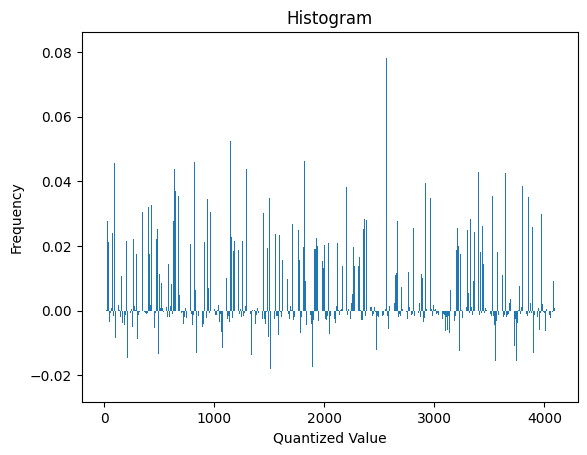

In [14]:
plot_histogram(df_CNN,0,n_bins=4096, feature_type='CNN')

In [15]:
#convert each row to numpyy array 
from tqdm import notebook
for index,row in notebook.tqdm(df_CNN.iterrows()):
    df_CNN.at[index, 'features_CNN'] = get_hist_from_str(df_CNN.at[index, 'features_CNN'], separator=',')

0it [00:00, ?it/s]

In [16]:
print(df_CNN['features_CNN'][0])
print(type(df_CNN['features_CNN'][0]))

[ 0.02905361  0.00529691  0.04431615 ...  0.03970027 -0.00438279
  0.00016648]
<class 'numpy.ndarray'>


In [17]:
image_example = df_CNN["image_name"][0]
df_query = query_image(df_CNN, image_example, measure="euclidean", feature_type = "CNN")
df_query.head()

,image_name,histogram,features_CNN,similarity
0,0_430b273cb7915d83.jpg,[0.00891516 0.01386802 0.00924535 0.00891516 0...,"[0.029053612, 0.005296911, 0.04431615, 8.36852...",0.000000
1,128400.jpg,[0.00867227 0.01663866 0.00373109 0.01109244 0...,"[0.026536468, 0.006892562, 0.042116687, 0.0011...",0.094331
2,134300.jpg,[0.00897479 0.01068908 0.00635294 0.00836975 0...,"[0.02729461, 0.0052069454, 0.042228706, 0.0006...",0.097636
3,113300.jpg,[0.00369548 0.00854579 0.00485031 0.00646709 0...,"[0.026739892, 0.0052878833, 0.041170012, -0.00...",0.102968
4,107700.jpg,[0.00660526 0.00220175 0.00660526 0.00660526 0...,"[0.028466465, 0.0054746494, 0.04325634, -0.002...",0.109970


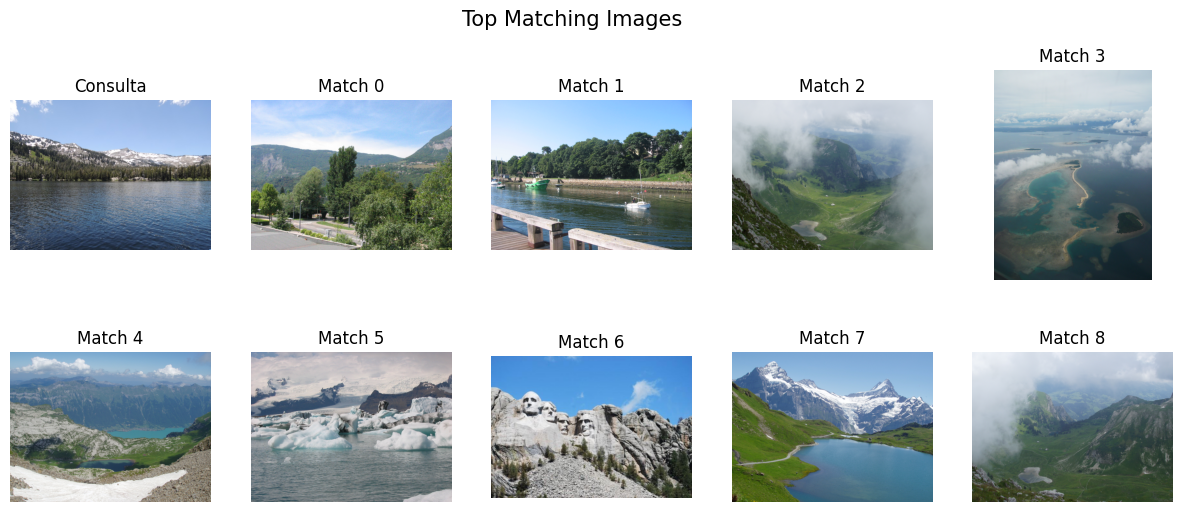

In [18]:
plot_10(df_query,path_to_images)

## Fusión de Ranking

In [40]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from tqdm import notebook

df_handcrafted = pd.read_csv('/root/labint/scripts/LabInt/csv/total_quant_histogram.csv')
df_CNN = pd.read_csv('/root/labint/scripts/LabInt/csv/total_histogram_CNN.csv')
df_handcrafted["class"] = df_handcrafted["image_name"].apply(lambda x: SIFT.get_class(x))


for index,row in notebook.tqdm(df_CNN.iterrows()):
    df_CNN.at[index, 'features_CNN'] = get_hist_from_str(df_CNN.at[index, 'features_CNN'], separator=',')
    df_CNN.at[index, 'histogram'] = get_hist_from_str(df_CNN.at[index, 'histogram'], separator=' ')


df_handcrafted["features_histogram"] = df_handcrafted["histogram"].apply(lambda x: get_hist_from_str(x, separator=' '))
df_CNN["class"] = df_CNN["image_name"].apply(lambda x: SIFT.get_class(x))



0it [00:00, ?it/s]

#NOTES:
preprocess to obtante concatenated features
create xtrain and ytrain  

In [62]:
#concat process

df_CNN['histogram'] = np.reshape(df_CNN['histogram'],-1)
save = pd.concat([df_CNN['histogram'],df_CNN['features_CNN']], axis = 0)
print(save.shape)
test_reshape =np.reshape(save,(13491,2))
print(test_reshape.shape)
test_reshape[0]

(13491,)
(4096,)
(13491,)
(13491,)
(26982,)
(13491, 2)


array([array([0.00891516, 0.01386802, 0.00924535, 0.00891516, 0.02080203,
              0.00165096, 0.01518879, 0.00693401, 0.01023592, 0.01188688,
              0.00759439, 0.00528306, 0.00825478, 0.01386802, 0.00957554,
              0.0108963 , 0.00627363, 0.01155669, 0.00924535, 0.00660382,
              0.0072642 , 0.00594344, 0.02509452, 0.01122649, 0.00759439,
              0.00462267, 0.00990573, 0.00957554, 0.02806624, 0.00231134,
              0.01254726, 0.00330191, 0.00990573, 0.0108963 , 0.00198115,
              0.00429248, 0.01518879, 0.00495287, 0.01320764, 0.00297172,
              0.00627363, 0.00297172, 0.00627363, 0.00759439, 0.00594344,
              0.0036321 , 0.00693401, 0.00825478, 0.00099057, 0.00495287,
              0.00693401, 0.00462267, 0.00627363, 0.00759439, 0.00297172,
              0.00957554, 0.00792458, 0.00792458, 0.00198115, 0.00561325,
              0.01948127, 0.00693401, 0.00759439, 0.02014165, 0.01584917,
              0.00264153, 0.00660382, 

In [ ]:

# Instantiate the LinearDiscriminantAnalysis model
lda = LinearDiscriminantAnalysis()


# Fit the model to the training data
lda.fit(X_train, y_train)

# Perform dimensionality reduction using LDA
X_train_lda = lda.transform(X_train)
X_test_lda = lda.transform(X_test)

# Use the transformed data for further analysis or modeling
# For example, you can train a classifier using the transformed features
classifier.fit(X_train_lda, y_train) 

(1, 10)
